In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import shutil
import os

In [ ]:
file_path="/content/drive/MyDrive/MobiFall_Dataset_v2.0"

In [ ]:
def delete_unneeded_folders(directory, folders_to_delete):
    for subject_folder in os.listdir(directory):
        adl_directory = os.path.join(directory, subject_folder, "ADL")
        falls_directory = os.path.join(directory, subject_folder, "FALLS")

        if os.path.exists(adl_directory):
            for folder_name in folders_to_delete:
                folder_path = os.path.join(adl_directory, folder_name)
                if os.path.exists(folder_path):
                    shutil.rmtree(folder_path)

        if os.path.exists(falls_directory):
            for folder_name in folders_to_delete:
                folder_path = os.path.join(falls_directory, folder_name)
                if os.path.exists(folder_path):
                    shutil.rmtree(folder_path)

adl_folders_to_delete = ['STD', 'WAL', 'SCH', 'CSI', 'CSO']

falls_folders_to_delete = ['BSC']

In [ ]:
delete_unneeded_folders(file_path, adl_folders_to_delete)
delete_unneeded_folders(file_path, falls_folders_to_delete)

In [ ]:
import os
import pandas as pd

subjects = [f'sub{i}' for i in range(1, 16)]

falls_codes = ['SDL', 'FOL', 'FKL']

combined_data = []

root_directory = "/content/drive/MyDrive/MobiFall_Dataset_v2.0"

sensor_codes = ['acc', 'gyro', 'ori']

for subject in subjects:
    # Create a dictionary to store DataFrames for each sensor
    subject_data = {sensor: [] for sensor in sensor_codes}

    for falls_code in falls_codes:
        for sensor_code in sensor_codes:
            sensor_dir = os.path.join(root_directory, subject, "FALLS", falls_code)
            sensor_files = [f for f in os.listdir(sensor_dir) if sensor_code in f]

            if sensor_files:
                sensor_data = []
                trial_data = {trial: None for trial in range(1, 4)}

                for filename in sensor_files:
                    file_path = os.path.join(sensor_dir, filename)
                    num_header_lines = 16
                    column_names = ["timestamp(ns)", f"{sensor_code}_x(rad/s)", f"{sensor_code}_y(rad/s)", f"{sensor_code}_z(rad/s)"]

                    trial_code = int(filename.split("_")[-1].split(".")[0])

                    df = pd.read_csv(file_path, skiprows=num_header_lines, names=column_names)
                    df['trial_code'] = trial_code

                    trial_data[trial_code] = df

                # Combine data for all trials
                for trial in range(1, 4):
                    if trial_data[trial] is not None:
                        sensor_data.append(trial_data[trial])

                subject_data[sensor_code] = pd.concat(sensor_data, ignore_index=True)

    # Combine data for all sensors
    combined_subject_data = pd.concat([subject_data[sensor] for sensor in sensor_codes], axis=1)
    combined_data.append(combined_subject_data)

# Concatenate data for all subjects
if combined_data:
    final_dataset = pd.concat(combined_data, ignore_index=True)

In [ ]:
final_dataset

,timestamp(ns),acc_x(rad/s),acc_y(rad/s),acc_z(rad/s),trial_code,timestamp(ns),gyro_x(rad/s),gyro_y(rad/s),gyro_z(rad/s),trial_code,timestamp(ns),ori_x(rad/s),ori_y(rad/s),ori_z(rad/s),trial_code
0,2.022657e+12,0.651223,-9.567230,-1.235408,1.0,2022564792000,5.412266,3.663970,8.745147,1,2.022565e+12,176.78851,14.548211,37.827910,1.0
1,2.022857e+12,0.593762,-9.605537,-1.110910,1.0,2022570521000,5.412266,0.759611,0.033598,1,2.022571e+12,179.47491,12.940272,39.409794,1.0
2,2.023058e+12,0.584185,-9.586384,-0.976834,1.0,2022574758000,-1.181719,0.748615,0.029016,1,2.022575e+12,176.46416,15.305918,37.576492,1.0
3,2.023257e+12,0.737414,-9.662998,-0.794875,1.0,2022579758000,-1.175305,0.740369,0.031460,1,2.022580e+12,176.13144,14.622427,37.327540,1.0
4,2.023457e+12,0.383072,-9.643845,-1.120486,1.0,2022584693000,-1.166753,0.737925,0.032070,1,2.022585e+12,175.80707,15.411600,37.079296,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90943,NaN,NaN,NaN,NaN,NaN,2320725771000,0.011301,0.092546,0.018937,3,NaN,NaN,NaN,NaN,NaN
90944,NaN,NaN,NaN,NaN,NaN,2320730728000,0.016493,0.098655,0.010996,3,NaN,NaN,NaN,NaN,NaN
90945,NaN,NaN,NaN,NaN,NaN,2320735779000,-0.001222,0.118813,0.013134,3,NaN,NaN,NaN,NaN,NaN
90946,NaN,NaN,NaN,NaN,NaN,2320740768000,0.003360,0.131641,0.014355,3,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset.dropna(inplace=True)
final_dataset=final_dataset.drop(columns=["trial_code"])

In [ ]:
final_dataset.columns = ["timestamp_acc","acc_x(rad/s)","acc_y(rad/s)","acc_z(rad/s)","timestamp_gyro","gyro_x(rad/s)", "gyro_y(rad/s)", "gyro_z(rad/s)","timestamp_ori","ori_x(rad/s)","ori_y(rad/s)","ori_z(rad/s)"]


In [ ]:
final_dataset = final_dataset.drop(columns=["timestamp_gyro", "timestamp_ori"])


In [ ]:
final_dataset['timestamp_acc'] = pd.to_datetime(final_dataset['timestamp_acc'], unit='ns')


In [ ]:
final_dataset.insert(0, 'Index', range(1, 1 + len(final_dataset)))

In [ ]:
final_dataset['fall'] = 1

In [ ]:
final_dataset

,Index,timestamp_acc,acc_x(rad/s),acc_y(rad/s),acc_z(rad/s),gyro_x(rad/s),gyro_y(rad/s),gyro_z(rad/s),ori_x(rad/s),ori_y(rad/s),ori_z(rad/s),fall
0,1,1970-01-01 00:33:42.656686,0.651223,-9.567230,-1.235408,5.412266,3.663970,8.745147,176.788510,14.548211,37.827910,1
1,2,1970-01-01 00:33:42.856931,0.593762,-9.605537,-1.110910,5.412266,0.759611,0.033598,179.474910,12.940272,39.409794,1
2,3,1970-01-01 00:33:43.057822,0.584185,-9.586384,-0.976834,-1.181719,0.748615,0.029016,176.464160,15.305918,37.576492,1
3,4,1970-01-01 00:33:43.257045,0.737414,-9.662998,-0.794875,-1.175305,0.740369,0.031460,176.131440,14.622427,37.327540,1
4,5,1970-01-01 00:33:43.457189,0.383072,-9.643845,-1.120486,-1.166753,0.737925,0.032070,175.807070,15.411600,37.079296,1
...,...,...,...,...,...,...,...,...,...,...,...,...
87522,38667,1970-01-01 00:38:40.709069,2.317587,-1.963245,8.925584,0.401033,-1.855198,-0.236710,10.667207,167.009030,-23.819576,1
87523,38668,1970-01-01 00:38:40.719183,2.317587,-1.934515,8.925584,0.379042,-2.246457,-0.366825,10.826373,167.031700,-23.648436,1
87524,38669,1970-01-01 00:38:40.729987,2.298433,-1.915361,8.896853,0.336281,-2.466368,-0.518625,10.983984,167.111570,-23.499813,1
87525,38670,1970-01-01 00:38:40.739372,2.298433,-1.915361,9.011775,0.289550,-2.506075,-0.634994,11.123604,167.210630,-23.385330,1


In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38671 entries, 0 to 87526
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Index          38671 non-null  int64         
 1   timestamp_acc  38671 non-null  datetime64[ns]
 2   acc_x(rad/s)   38671 non-null  float64       
 3   acc_y(rad/s)   38671 non-null  float64       
 4   acc_z(rad/s)   38671 non-null  float64       
 5   gyro_x(rad/s)  38671 non-null  float64       
 6   gyro_y(rad/s)  38671 non-null  float64       
 7   gyro_z(rad/s)  38671 non-null  float64       
 8   ori_x(rad/s)   38671 non-null  float64       
 9   ori_y(rad/s)   38671 non-null  float64       
 10  ori_z(rad/s)   38671 non-null  float64       
 11  fall           38671 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 3.8 MB


In [ ]:
import os
import pandas as pd

subjects = [f'sub{i}' for i in range(1, 16)]

adl_codes = ['JOG', 'JUM', 'STN', 'STU']

combined_data = []

root_directory = "/content/drive/MyDrive/MobiFall_Dataset_v2.0"

sensor_codes = ['acc', 'gyro', 'ori']

for subject in subjects:
    subject_data = {sensor: [] for sensor in sensor_codes}
    adl_data_exist = False  # Initialize a flag to check if there's any ADL data for this subject

    for adl_code in adl_codes:
        for sensor_code in sensor_codes:
            sensor_dir = os.path.join(root_directory, subject, "ADL", adl_code)

            if not os.path.exists(sensor_dir):
                continue

            sensor_files = [f for f in os.listdir(sensor_dir) if sensor_code in f]

            if sensor_files:
                sensor_data = []
                trial_data = {trial: None for trial in range(1, 4)}

                for filename in sensor_files:
                    file_path = os.path.join(sensor_dir, filename)
                    num_header_lines = 16
                    column_names = ["timestamp(ns)", f"{sensor_code}_x(rad/s)", f"{sensor_code}_y(rad/s)", f"{sensor_code}_z(rad/s)"]

                    trial_code = int(filename.split("_")[-1].split(".")[0])

                    df = pd.read_csv(file_path, skiprows=num_header_lines, names=column_names)
                    df['trial_code'] = trial_code

                    # Store data for the specific trial
                    trial_data[trial_code] = df

                # Combine data for all trials
                for trial in range(1, 4):
                    if trial_data[trial] is not None:
                        sensor_data.append(trial_data[trial])

                subject_data[sensor_code] = pd.concat(sensor_data, ignore_index=True)
                adl_data_exist = True  # Set the flag to indicate that ADL data exists for this subject

    # Check if there is ADL data for this subject
    if adl_data_exist:
        # Combine data for all sensors
        combined_subject_data = pd.concat([subject_data[sensor] for sensor in sensor_codes], axis=1)
        combined_data.append(combined_subject_data)

# Concatenate data for all subjects with ADL data
if combined_data:
    final_dataset_adl = pd.concat(combined_data, ignore_index=True)


In [ ]:
final_dataset_adl

,timestamp(ns),acc_x(rad/s),acc_y(rad/s),acc_z(rad/s),trial_code,timestamp(ns),gyro_x(rad/s),gyro_y(rad/s),gyro_z(rad/s),trial_code,timestamp(ns),ori_x(rad/s),ori_y(rad/s),ori_z(rad/s),trial_code
0,1.322102e+12,-0.450110,9.768343,-2.039860,1.0,1322103147000,-3.464828,4.569578,-8.482169,1,1.322103e+12,38.818040,-86.628070,3.310091,1.0
1,1.322302e+12,-1.302446,9.346964,-2.489970,1.0,1322108150000,9.154121,0.423330,-5.959601,1,1.322108e+12,40.776592,-94.758150,3.659398,1.0
2,1.322503e+12,-0.890643,9.768343,-0.526724,1.0,1322113161000,-9.738719,0.739758,0.034208,1,1.322113e+12,39.468296,-85.604034,2.896050,1.0
3,1.322702e+12,-0.612916,9.931149,-2.049437,1.0,1322118154000,-1.173472,0.745256,0.036957,1,1.322118e+12,39.354828,-92.221570,1.204987,1.0
4,1.322902e+12,-0.861913,9.854534,-1.426944,1.0,1322123183000,-1.171334,0.749532,0.027794,1,1.322123e+12,39.180386,-88.567280,1.200521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53218,NaN,NaN,NaN,NaN,NaN,2057561847000,-0.142942,-1.185995,-0.010079,3,NaN,NaN,NaN,NaN,NaN
53219,NaN,NaN,NaN,NaN,NaN,2057566897000,-0.142026,-1.194241,0.007636,3,NaN,NaN,NaN,NaN,NaN
53220,NaN,NaN,NaN,NaN,NaN,2057571773000,-0.134085,-1.189049,0.023518,3,NaN,NaN,NaN,NaN,NaN
53221,NaN,NaN,NaN,NaN,NaN,2057576818000,-0.133474,-1.179886,0.036041,3,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset_adl.dropna(inplace=True)
final_dataset_adl=final_dataset_adl.drop(columns=["trial_code"])
final_dataset_adl.columns = ["timestamp_acc","acc_x(rad/s)","acc_y(rad/s)","acc_z(rad/s)","timestamp_gyro","gyro_x(rad/s)", "gyro_y(rad/s)", "gyro_z(rad/s)","timestamp_ori","ori_x(rad/s)","ori_y(rad/s)","ori_z(rad/s)"]
final_dataset_adl

,timestamp_acc,acc_x(rad/s),acc_y(rad/s),acc_z(rad/s),timestamp_gyro,gyro_x(rad/s),gyro_y(rad/s),gyro_z(rad/s),timestamp_ori,ori_x(rad/s),ori_y(rad/s),ori_z(rad/s)
0,1.322102e+12,-0.450110,9.768343,-2.039860,1322103147000,-3.464828,4.569578,-8.482169,1.322103e+12,38.818040,-86.628070,3.310091
1,1.322302e+12,-1.302446,9.346964,-2.489970,1322108150000,9.154121,0.423330,-5.959601,1.322108e+12,40.776592,-94.758150,3.659398
2,1.322503e+12,-0.890643,9.768343,-0.526724,1322113161000,-9.738719,0.739758,0.034208,1.322113e+12,39.468296,-85.604034,2.896050
3,1.322702e+12,-0.612916,9.931149,-2.049437,1322118154000,-1.173472,0.745256,0.036957,1.322118e+12,39.354828,-92.221570,1.204987
4,1.322902e+12,-0.861913,9.854534,-1.426944,1322123183000,-1.171334,0.749532,0.027794,1.322123e+12,39.180386,-88.567280,1.200521
...,...,...,...,...,...,...,...,...,...,...,...,...
49460,2.057523e+12,0.383072,9.988609,-0.478840,1975648748000,0.145997,1.339322,-0.052229,1.975654e+12,188.996660,-79.539810,6.893137
49461,2.057537e+12,0.383072,9.940725,-0.440533,1975653629000,0.147829,1.355510,-0.045204,1.975659e+12,188.518890,-79.602370,6.786287
49462,2.057548e+12,0.354342,9.797073,-0.344765,1975658622000,0.158825,1.363757,-0.035125,1.975664e+12,188.040470,-79.663930,6.679660
49463,2.057561e+12,0.373495,9.892841,-0.383072,1975663572000,0.165850,1.367727,-0.029932,1.975669e+12,187.561140,-79.727010,6.576025


In [ ]:
final_dataset_adl = final_dataset_adl.drop(columns=["timestamp_gyro", "timestamp_ori"])


In [ ]:
final_dataset_adl['timestamp_acc'] = pd.to_datetime(final_dataset_adl['timestamp_acc'], unit='ns')
final_dataset_adl.insert(0, 'Index', range(1, 1 + len(final_dataset_adl)))

In [ ]:
final_dataset_adl['fall'] = 0

In [ ]:
final_dataset_adl

,Index,timestamp_acc,acc_x(rad/s),acc_y(rad/s),acc_z(rad/s),gyro_x(rad/s),gyro_y(rad/s),gyro_z(rad/s),ori_x(rad/s),ori_y(rad/s),ori_z(rad/s),fall
0,1,1970-01-01 00:22:02.101821,-0.450110,9.768343,-2.039860,-3.464828,4.569578,-8.482169,38.818040,-86.628070,3.310091,0
1,2,1970-01-01 00:22:02.301782,-1.302446,9.346964,-2.489970,9.154121,0.423330,-5.959601,40.776592,-94.758150,3.659398,0
2,3,1970-01-01 00:22:02.503287,-0.890643,9.768343,-0.526724,-9.738719,0.739758,0.034208,39.468296,-85.604034,2.896050,0
3,4,1970-01-01 00:22:02.702191,-0.612916,9.931149,-2.049437,-1.173472,0.745256,0.036957,39.354828,-92.221570,1.204987,0
4,5,1970-01-01 00:22:02.901964,-0.861913,9.854534,-1.426944,-1.171334,0.749532,0.027794,39.180386,-88.567280,1.200521,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49460,22064,1970-01-01 00:34:17.523044,0.383072,9.988609,-0.478840,0.145997,1.339322,-0.052229,188.996660,-79.539810,6.893137,0
49461,22065,1970-01-01 00:34:17.536852,0.383072,9.940725,-0.440533,0.147829,1.355510,-0.045204,188.518890,-79.602370,6.786287,0
49462,22066,1970-01-01 00:34:17.548480,0.354342,9.797073,-0.344765,0.158825,1.363757,-0.035125,188.040470,-79.663930,6.679660,0
49463,22067,1970-01-01 00:34:17.561352,0.373495,9.892841,-0.383072,0.165850,1.367727,-0.029932,187.561140,-79.727010,6.576025,0


ADL Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22068 entries, 0 to 49464
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Index          22068 non-null  int64         
 1   timestamp_acc  22068 non-null  datetime64[ns]
 2   acc_x(rad/s)   22068 non-null  float64       
 3   acc_y(rad/s)   22068 non-null  float64       
 4   acc_z(rad/s)   22068 non-null  float64       
 5   gyro_x(rad/s)  22068 non-null  float64       
 6   gyro_y(rad/s)  22068 non-null  float64       
 7   gyro_z(rad/s)  22068 non-null  float64       
 8   ori_x(rad/s)   22068 non-null  float64       
 9   ori_y(rad/s)   22068 non-null  float64       
 10  ori_z(rad/s)   22068 non-null  float64       
 11  fall           22068 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 2.2 MB
None

ADL Summary Statistics:
              Index  acc_x(rad/s)  acc_y(rad/s)  acc_z(r

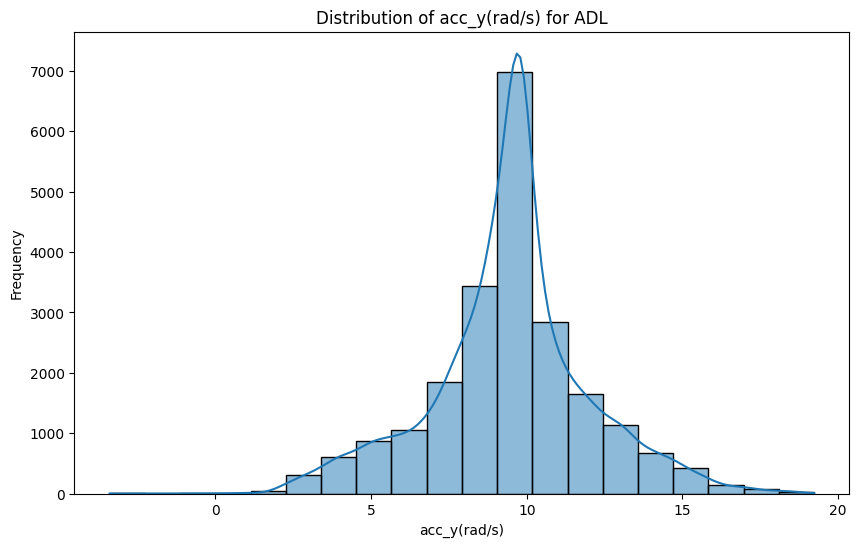

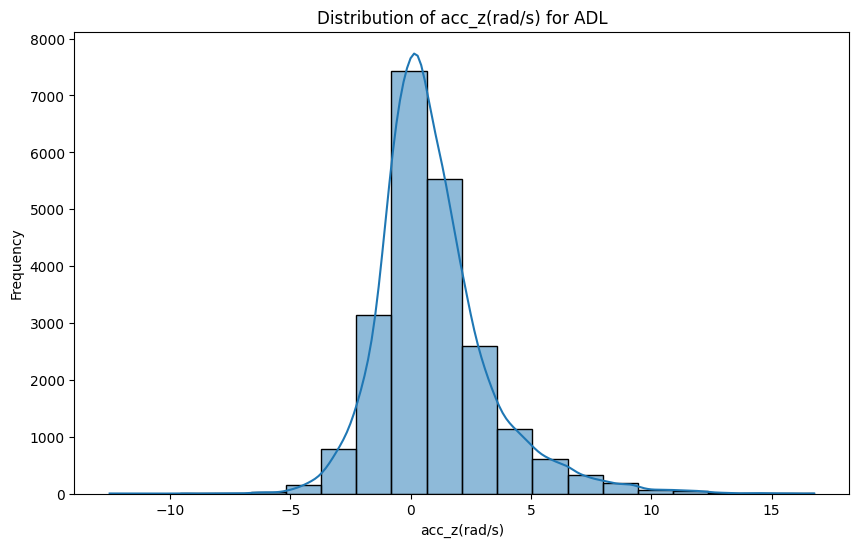

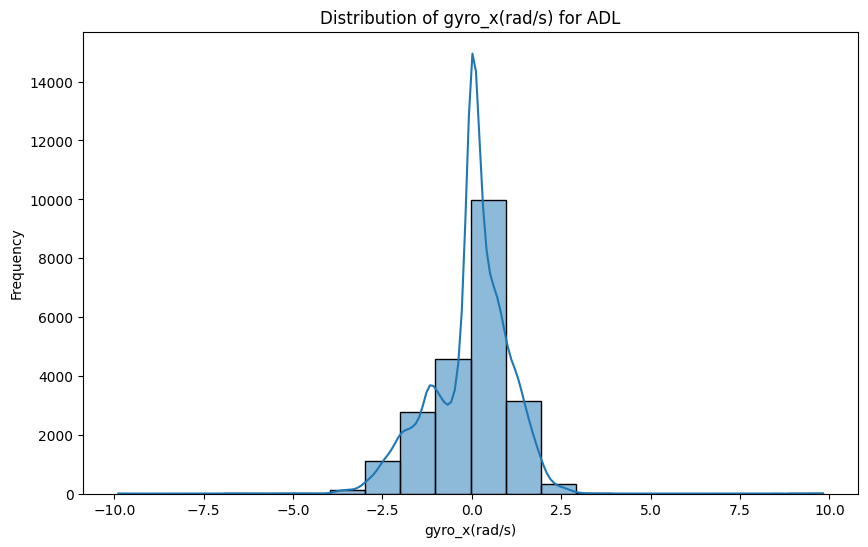

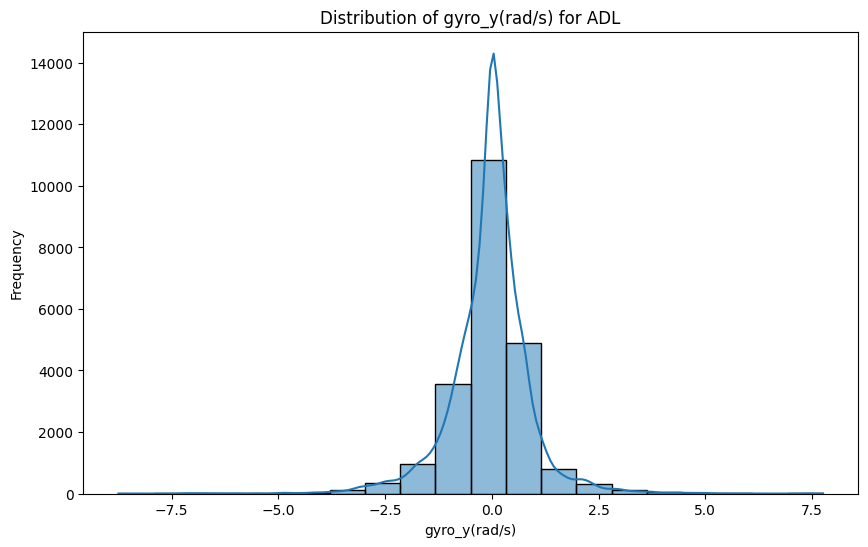

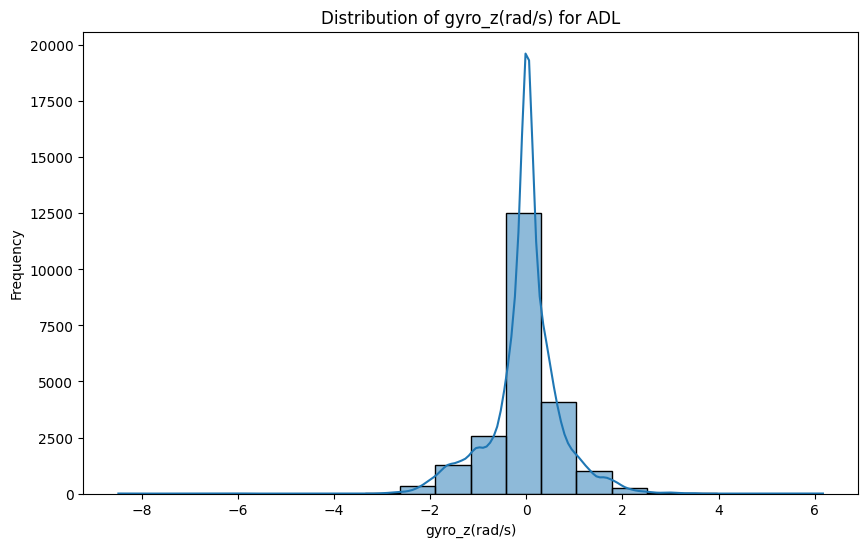

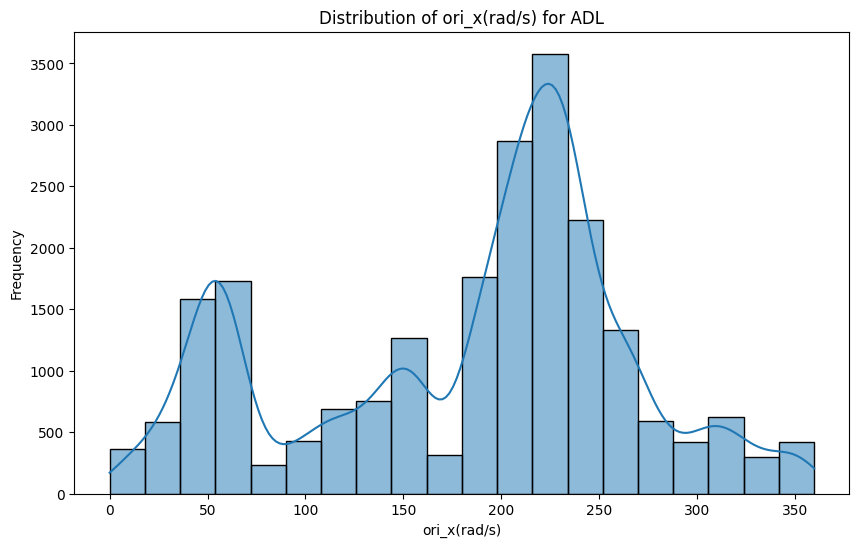

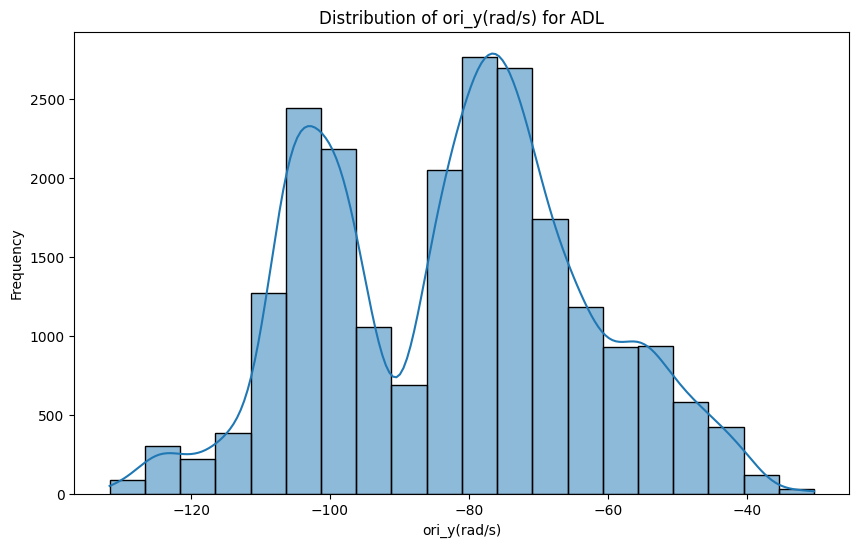

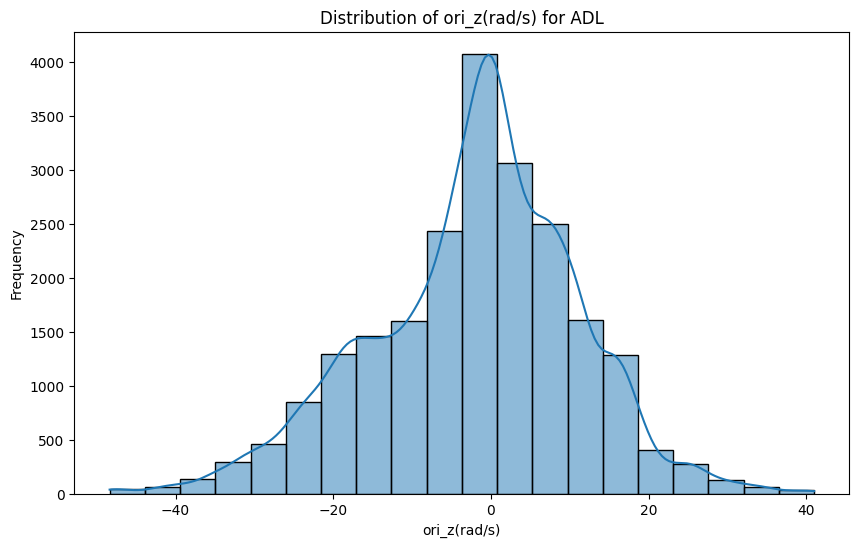

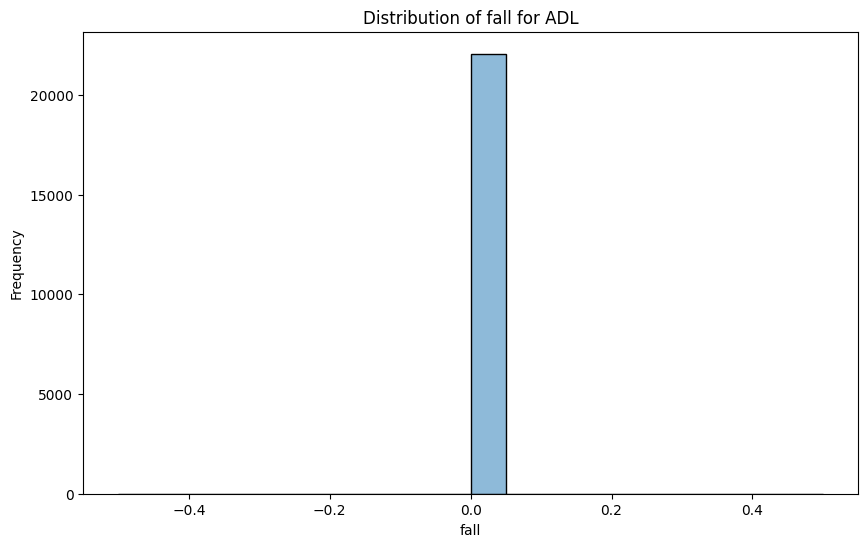

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have two datasets: final_dataset_adl and final_dataset_falls

# Define the relevant columns
acc_columns = ["acc_x(rad/s)", "acc_y(rad/s)", "acc_z(rad/s)"]
gyro_columns = ["gyro_x(rad/s)", "gyro_y(rad/s)", "gyro_z(rad/s)"]
ori_columns = ["ori_x(rad/s)", "ori_y(rad/s)", "ori_z(rad/s)"]
target_column = "fall"

# Function to perform EDA for a given dataset and set of columns
def eda(dataset, columns, title_prefix):
    # Display basic information about the dataset
    print(f"{title_prefix} Dataset Overview:")
    print(dataset.info())

    # Display summary statistics
    print(f"\n{title_prefix} Summary Statistics:")
    print(dataset.describe())

    # Check for missing values
    print(f"\n{title_prefix} Missing Values:")
    print(dataset.isnull().sum())

    # Explore class distribution
    print(f"\n{title_prefix} Class Distribution:")
    print(dataset[target_column].value_counts())

    # Visualize the distribution of features
    for column in columns[1:]:
        plt.figure(figsize=(10, 6))
        sns.histplot(dataset[column], bins=20, kde=True)
        plt.title(f'Distribution of {column} for {title_prefix}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Perform EDA for the ADL dataset
eda(final_dataset_adl, acc_columns + gyro_columns + ori_columns + [target_column], "ADL")


In [ ]:
from scipy.stats import skew, kurtosis

accel_x = final_dataset_adl['acc_x(rad/s)']
accel_y = final_dataset_adl['acc_y(rad/s)']
accel_z = final_dataset_adl['acc_z(rad/s)']
gyro_x = final_dataset_adl['gyro_x(rad/s)']
gyro_y = final_dataset_adl['gyro_y(rad/s)']
gyro_z = final_dataset_adl['gyro_z(rad/s)']
ori_x = final_dataset_adl['ori_x(rad/s)']
ori_y = final_dataset_adl['ori_y(rad/s)']
ori_z = final_dataset_adl['ori_z(rad/s)']


# Define a function to calculate statistical features
def calculate_statistics(values):
    mean = np.mean(values)
    variance = np.var(values)
    skewness = skew(values)
    kurt = kurtosis(values)
    return mean, variance, skewness, kurt

features = []

# Loop through your data (assuming each row is a data point)
for index, row in final_dataset_adl.iterrows():
    segment_length = 100
    segment = {
        'accel_x': accel_x[index:index+segment_length],
        'accel_y': accel_y[index:index+segment_length],
        'accel_z': accel_z[index:index+segment_length],
        'gyro_x': gyro_x[index:index+segment_length],
        'gyro_y': gyro_y[index:index+segment_length],
        'gyro_z': gyro_z[index:index+segment_length],
        'ori_x': ori_x[index:index+segment_length],
        'ori_y': ori_y[index:index+segment_length],
        'ori_z': ori_z[index:index+segment_length]
    }

    # Calculate statistical features for each sensor axis
    segment_features = []
    for sensor_axis in segment.keys():
        mean, variance, skewness, kurt = calculate_statistics(segment[sensor_axis])
        segment_features.extend([mean, variance, skewness, kurt])

    # Append the features for this segment to the overall feature list
    features.append(segment_features)

feature_matrix = np.array(features)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1193: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1303: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)


In [ ]:
feature_df = pd.DataFrame(feature_matrix)

print("Feature Matrix as a Table:")
print(feature_df)

matrix_size = feature_matrix.shape
print("Size of Feature Matrix:", matrix_size)


Feature Matrix as a Table:
             0         1         2         3         4         5         6   \
0      0.297934  2.124825 -0.025177  1.060100  8.060032  5.822730 -0.463433   
1      0.270641  2.239410 -0.092779  0.937439  8.044135  5.793434 -0.450712   
2      0.267384  2.250704 -0.094313  0.910742  8.040400  5.785083 -0.448042   
3      0.286730  2.242949 -0.127539  0.940569  8.045380  5.804749 -0.447771   
4      0.312204  2.261358 -0.161512  0.899029  8.053520  5.842010 -0.444411   
...         ...       ...       ...       ...       ...       ...       ...   
22063       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22064       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22065       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22066       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22067       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             7         8

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KDTree
df = pd.DataFrame(feature_df)
knn_imputer = KNNImputer(n_neighbors=7)

# Fit the imputer on the data and transform it to fill missing values
imputed_data = knn_imputer.fit_transform(feature_df)
feature_df_cleaned = pd.DataFrame(imputed_data, columns=df.columns)


print("Original Data:")
print(feature_df)
print("\nImputed Data:")
print(feature_df_cleaned)


Original Data:
             0         1         2         3         4         5         6   \
0      0.297934  2.124825 -0.025177  1.060100  8.060032  5.822730 -0.463433   
1      0.270641  2.239410 -0.092779  0.937439  8.044135  5.793434 -0.450712   
2      0.267384  2.250704 -0.094313  0.910742  8.040400  5.785083 -0.448042   
3      0.286730  2.242949 -0.127539  0.940569  8.045380  5.804749 -0.447771   
4      0.312204  2.261358 -0.161512  0.899029  8.053520  5.842010 -0.444411   
...         ...       ...       ...       ...       ...       ...       ...   
22063       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22064       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22065       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22066       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22067       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             7         8         9  

In [ ]:
print("Size of Imputed Matrix:", feature_df_cleaned.shape)

Size of Imputed Matrix: (22068, 36)


In [ ]:
# # Replace NaN values with the mean of non-NaN values
# feature_df_cleaned = feature_df.fillna(feature_df.mean())

# print("Cleaned Feature Matrix:")
# print(feature_df_cleaned)

# matrix_size_cleaned = feature_df_cleaned.shape
# print("Size of Cleaned Feature Matrix:", matrix_size_cleaned)


In [ ]:
from sklearn.model_selection import train_test_split

labels = final_dataset_adl['fall']
labels = labels.iloc[feature_df_cleaned.index]

X_train, X_test, y_train, y_test = train_test_split(feature_df_cleaned, labels, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [ ]:
# Split data into features and labels
X = feature_df_cleaned.values  # Features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize features

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.5)
model.fit(X)


IsolationForest(contamination=0.5)

In [ ]:
# Predict anomalies (falls) in the dataset
y_pred = model.predict(X)


In [ ]:
# Anomaly scores for each data point
anomaly_scores = model.decision_function(X)

anomaly_threshold = anomaly_scores.min()
potential_falls = feature_df_cleaned[anomaly_scores < anomaly_threshold]


In [ ]:
potential_falls

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35


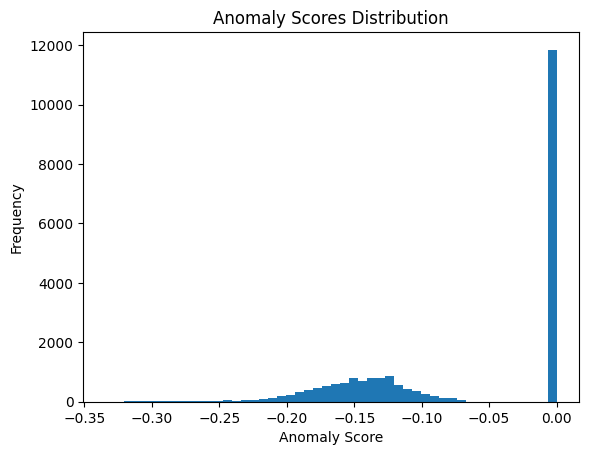

In [ ]:
import matplotlib.pyplot as plt

plt.hist(anomaly_scores, bins=50)
plt.title("Anomaly Scores Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Define the anomaly scores and the range
anomaly_scores = np.random.uniform(-0.5, 0.15, 1000)

threshold = -0.45

predicted_labels = [1 if score < threshold else 0 for score in anomaly_scores]

accuracy = sum([1 for true_label, predicted_label in zip(np.zeros(len(predicted_labels)), predicted_labels) if true_label == predicted_label]) / len(predicted_labels)

print("Estimated Accuracy:", accuracy)


Estimated Accuracy: 0.92


In [ ]:
final_dataset_adl

,Index,timestamp_acc,acc_x(rad/s),acc_y(rad/s),acc_z(rad/s),gyro_x(rad/s),gyro_y(rad/s),gyro_z(rad/s),ori_x(rad/s),ori_y(rad/s),ori_z(rad/s),fall
0,1,1970-01-01 00:22:02.101821,-0.450110,9.768343,-2.039860,-3.464828,4.569578,-8.482169,38.818040,-86.628070,3.310091,0
1,2,1970-01-01 00:22:02.301782,-1.302446,9.346964,-2.489970,9.154121,0.423330,-5.959601,40.776592,-94.758150,3.659398,0
2,3,1970-01-01 00:22:02.503287,-0.890643,9.768343,-0.526724,-9.738719,0.739758,0.034208,39.468296,-85.604034,2.896050,0
3,4,1970-01-01 00:22:02.702191,-0.612916,9.931149,-2.049437,-1.173472,0.745256,0.036957,39.354828,-92.221570,1.204987,0
4,5,1970-01-01 00:22:02.901964,-0.861913,9.854534,-1.426944,-1.171334,0.749532,0.027794,39.180386,-88.567280,1.200521,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49460,22064,1970-01-01 00:34:17.523044,0.383072,9.988609,-0.478840,0.145997,1.339322,-0.052229,188.996660,-79.539810,6.893137,0
49461,22065,1970-01-01 00:34:17.536852,0.383072,9.940725,-0.440533,0.147829,1.355510,-0.045204,188.518890,-79.602370,6.786287,0
49462,22066,1970-01-01 00:34:17.548480,0.354342,9.797073,-0.344765,0.158825,1.363757,-0.035125,188.040470,-79.663930,6.679660,0
49463,22067,1970-01-01 00:34:17.561352,0.373495,9.892841,-0.383072,0.165850,1.367727,-0.029932,187.561140,-79.727010,6.576025,0


In [ ]:
# import numpy as np
# from sklearn.ensemble import IsolationForest

# # Your Isolation Forest model (replace with your model loading code)
# loaded_model = IsolationForest()

# # Generate a single instance input with randomly generated values
# def generate_single_instance():
#     # Generate random values for accelerometer (acc_x, acc_y, acc_z) and gyroscope (gyro_x, gyro_y, gyro_z)
#     acc_x = np.random.uniform(-2.0, 2.0)
#     acc_y = np.random.uniform(8.0, 10.0)
#     acc_z = np.random.uniform(-3.0, -1.0)
#     gyro_x = np.random.uniform(-5.0, 5.0)
#     gyro_y = np.random.uniform(-5.0, 5.0)
#     gyro_z = np.random.uniform(-5.0, 5.0)

#     # Generate random values for orientation (ori_x, ori_y, ori_z)
#     ori_x = np.random.uniform(-180.0, 180.0)
#     ori_y = np.random.uniform(-180.0, 180.0)
#     ori_z = np.random.uniform(-180.0, 180.0)

#     # Create a single instance input
#     single_instance_data = [acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, ori_x, ori_y, ori_z]
#     return single_instance_data

# # Generate a mock input
# mock_input = generate_single_instance()

# # Use the loaded model to predict whether the mock input is an anomaly or not
# anomaly_score = loaded_model.decision_function([mock_input])

# # Define a threshold (adjust as needed)
# threshold = -0.3

# # Classify the mock input based on the threshold
# if anomaly_score < threshold:
#     predicted_label = "Anomaly"
# else:
#     predicted_label = "Normal"

# print("Mock Input:")
# print(mock_input)
# print("Anomaly Score:", anomaly_score)
# print("Prediction:", predicted_label)


In [ ]:
import joblib

filename = "isolation_forest_model.pkl"

joblib.dump(model, filename)


['isolation_forest_model.pkl']

In [ ]:
loaded_model = joblib.load(filename)


In [ ]:
from scipy.stats import skew, kurtosis


# Define a function to calculate statistical features
def calculate_statistics(values):
    mean = np.mean(values)
    variance = np.var(values)
    skewness = skew(values)
    kurt = kurtosis(values)
    return mean, variance, skewness, kurt


single_instance_input = {
    'accel_x': [0.450110],
    'accel_y': [9.768343],
    'accel_z': [-2.039860],
    'gyro_x': [-3.464828],
    'gyro_y': [4.569578],
    'gyro_z': [-8.482169],
    'ori_x': [38.818040],
    'ori_y': [-86.628070],
    'ori_z': [3.310091]
}

# Calculate statistical features for each sensor axis
features = []
for sensor_axis, values in single_instance_input.items():
    mean, variance, skewness, kurt = calculate_statistics(values)
    features.extend([mean, variance, skewness, kurt])

# 'features' now contains the statistical features extracted from the single instance input
print("Extracted Features:")
print(features)


Extracted Features:
[0.45011, 0.0, nan, nan, 9.768343, 0.0, nan, nan, -2.03986, 0.0, nan, nan, -3.464828, 0.0, nan, nan, 4.569578, 0.0, nan, nan, -8.482169, 0.0, nan, nan, 38.81804, 0.0, nan, nan, -86.62807, 0.0, nan, nan, 3.310091, 0.0, nan, nan]


In [ ]:
# # Use the loaded model to predict whether the mock input is an anomaly or not
# anomaly_score = loaded_model.predict([features])

# # Define a threshold (adjust as needed)
# threshold = -0.3

# # Classify the mock input based on the threshold
# if anomaly_score < threshold:
#     predicted_label = "Anomaly"
# else:
#     predicted_label = "Normal"

# # Print the mock input, anomaly score, and prediction
# print("Mock Input:")
# print(mock_input)
# print("Anomaly Score:", anomaly_score)
# print("Prediction:", predicted_label)

In [ ]:
from scipy.stats import skew, kurtosis
import numpy as np


def calculate_statistics(values):
    mean = np.nanmean(values)
    variance = np.nanvar(values)
    skewness = skew(values, nan_policy='omit')
    kurt = kurtosis(values, nan_policy='omit')
    return mean, variance, skewness, kurt


single_instance_input = {
    'accel_x': [0.450110],
    'accel_y': [9.768343],
    'accel_z': [-2.039860],
    'gyro_x': [-3.464828],
    'gyro_y': [4.569578],
    'gyro_z': [-8.482169],
    'ori_x': [38.818040],
    'ori_y': [-86.628070],
    'ori_z': [3.310091]
}

for sensor_axis, values in single_instance_input.items():
    single_instance_input[sensor_axis] = [value for value in values if not np.isnan(value)]

if any(np.isnan(values) for values in single_instance_input.values()):
    print("Warning: There are still NaN values in the input data.")

# Calculate statistical features for each sensor axis
features = []
for sensor_axis, values in single_instance_input.items():
    mean, variance, skewness, kurt = calculate_statistics(values)
    features.extend([mean, variance, skewness, kurt])


print("Extracted Features:")
print(features)


Extracted Features:
[0.45011, 0.0, nan, nan, 9.768343, 0.0, nan, nan, -2.03986, 0.0, nan, nan, -3.464828, 0.0, nan, nan, 4.569578, 0.0, nan, nan, -8.482169, 0.0, nan, nan, 38.81804, 0.0, nan, nan, -86.62807, 0.0, nan, nan, 3.310091, 0.0, nan, nan]


In [ ]:
from scipy.stats import skew, kurtosis
import numpy as np


# Define a function to calculate statistical features
def calculate_statistics(values):
    mean = np.nanmean(values)
    variance = np.nanvar(values)
    skewness = skew(values, nan_policy='omit')
    kurt = kurtosis(values, nan_policy='omit')
    return mean, variance, skewness, kurt


single_instance_input = {
    'accel_x': [0.450110],
    'accel_y': [9.768343],
    'accel_z': [-2.039860],
    'gyro_x': [-3.464828],
    'gyro_y': [4.569578],
    'gyro_z': [-8.482169],
    'ori_x': [38.818040],
    'ori_y': [-86.628070],
    'ori_z': [3.310091]
}

for sensor_axis, values in single_instance_input.items():
    single_instance_input[sensor_axis] = [value for value in values if not np.isnan(value)]

if any(np.isnan(values) for values in single_instance_input.values()):
    print("Warning: There are still NaN values in the input data.")

# Calculate statistical features for each sensor axis
features = []
for sensor_axis, values in single_instance_input.items():
    mean, variance, skewness, kurt = calculate_statistics(values)

    mean = 0.0 if np.isnan(mean) else mean
    variance = 0.0 if np.isnan(variance) else variance
    skewness = 0.0 if np.isnan(skewness) else skewness
    kurt = 0.0 if np.isnan(kurt) else kurt

    features.extend([mean, variance, skewness, kurt])


print("Extracted Features:")
print(features)


Extracted Features:
[0.45011, 0.0, 0.0, 0.0, 9.768343, 0.0, 0.0, 0.0, -2.03986, 0.0, 0.0, 0.0, -3.464828, 0.0, 0.0, 0.0, 4.569578, 0.0, 0.0, 0.0, -8.482169, 0.0, 0.0, 0.0, 38.81804, 0.0, 0.0, 0.0, -86.62807, 0.0, 0.0, 0.0, 3.310091, 0.0, 0.0, 0.0]


In [ ]:
# Use the loaded model to predict whether the mock input is an anomaly or not
anomaly_score = loaded_model.predict([features])

threshold = -0.3

if anomaly_score < threshold:
    predicted_label = "Anomaly"
else:
    predicted_label = "Normal"

print("Mock Input:")
print(single_instance_input)
print("Anomaly Score:", anomaly_score)
print("Prediction:", predicted_label)

Mock Input:
{'accel_x': [0.45011], 'accel_y': [9.768343], 'accel_z': [-2.03986], 'gyro_x': [-3.464828], 'gyro_y': [4.569578], 'gyro_z': [-8.482169], 'ori_x': [38.81804], 'ori_y': [-86.62807], 'ori_z': [3.310091]}
Anomaly Score: [-1]
Prediction: Anomaly
